##SUMMARY
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the hackathon that lets you do that.



Size of training set: 5961 records

Size of test set: 1987 records

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_excel('Final_Train.xlsx')
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [5]:
test=pd.read_excel('Final_Test.xlsx')
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [6]:
train.shape

(5961, 7)

In [7]:
test.shape

(1987, 6)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [10]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [11]:
test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

##checking null/na values

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755)


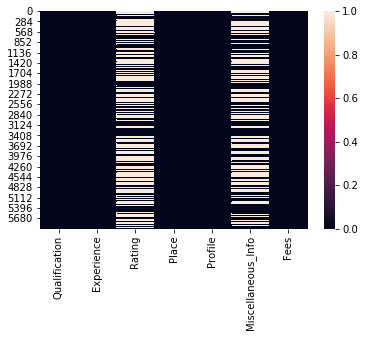

In [16]:
print(train.isnull().sum())
print("\n")
print(sns.heatmap(train.isnull()))



Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755)


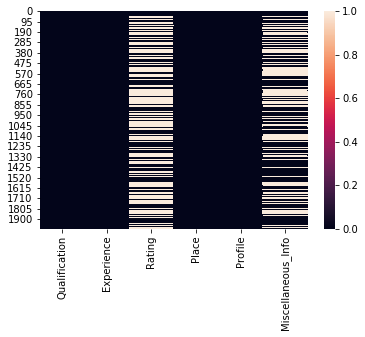

In [17]:
print(test.isnull().sum())
print("\n")
print(sns.heatmap(test.isnull()))




observations-

1.There are 3302 null values in Rating, 25 null values in Place, 2620 values in Miscellaneous_Info in train-dataset.
2. There are 1090 null values in Rating, 6 null values in Place, 834 null values in Miscellaneous_Info in test-dataset.

#Extract Numbers from Experience
-experience column has numbers,years,Experience as string

In [18]:
train[['Exp_Years','Years','Exp_string']]=train['Experience'].str.split(" ",expand=True)

In [19]:
test[['Exp_Years','Years','Exp_string']]=test['Experience'].str.split(" ",expand=True)

##Extract city and region names from place column

In [23]:
train[['Region','City','None']]=train['Place'].str.split(",",expand=True)

In [24]:
test[['Region','City']]=test['Place'].str.split(",",expand=True)

In [25]:
##Now will drop those columns which we don't need
train=train.drop(['Years','Exp_string','Experience','None','Place'], axis=1)
test=test.drop(['Years','Exp_string','Experience','Place'], axis=1)

In [26]:
#checking whether the changes are taken place in the dataset or not
train.head()

,Qualification,Rating,Profile,Miscellaneous_Info,Fees,Exp_Years,Region,City
0,"BHMS, MD - Homeopathy",100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",NaN,ENT Specialist,NaN,300,9,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bannerghatta Road,Bangalore
4,BAMS,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Keelkattalai,Chennai


In [27]:
test.head()

,Qualification,Rating,Profile,Miscellaneous_Info,Exp_Years,Region,City
0,MBBS,NaN,General Medicine,NaN,35,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",NaN,ENT Specialist,NaN,31,West Marredpally,Hyderabad
2,"MBBS, DDVL",70%,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",40,KK Nagar,Chennai
3,BAMS,NaN,Ayurveda,NaN,0,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",100%,Dentist,General Dentistry Conservative Dentistry Cosme...,16,Kanakpura Road,Bangalore


In [29]:
#as the Exp_Years is in categorical form we can change it in the int form
train['Exp_Years']=train['Exp_Years'].astype(int)
test['Exp_Years']=test['Exp_Years'].astype(int)

In [32]:
# replacing the % in the column with nothing since we need to convert the object to integer datatype
train['Rating']=train['Rating'].str.replace("%","")
test['Rating']=test['Rating'].str.replace("%","")

In [34]:
#convert into int
#train['Rating']=train['Rating'].astype(int)
#test['Rating']=test['Rating'].astype(int)
#we tried but bcz of presence of null values we couldn't able to convert them into int so can try for float
train['Rating']=train['Rating'].astype(float)
test['Rating']=test['Rating'].astype(float)

In [35]:
print(train.dtypes)
print("")
print(test.dtypes)

Qualification          object
Rating                float64
Profile                object
Miscellaneous_Info     object
Fees                    int64
Exp_Years               int64
Region                 object
City                   object
dtype: object

Qualification          object
Rating                float64
Profile                object
Miscellaneous_Info     object
Exp_Years               int64
Region                 object
City                   object
dtype: object


In [36]:
#as there are many nan values present in column rating
print(train.isna().sum())
print("")
print(test.isna().sum())

Qualification            0
Rating                3302
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Exp_Years                0
Region                  25
City                    26
dtype: int64

Qualification            0
Rating                1090
Profile                  0
Miscellaneous_Info     834
Exp_Years                0
Region                   6
City                     6
dtype: int64


In [37]:
#Filling NAN values with mean
train['Rating']=train['Rating'].fillna(train['Rating'].mean())
test['Rating']=test['Rating'].fillna(test['Rating'].mean())

In [38]:
#as we can see there are nan values in column-'miscellaneous_info',but is not uniform, so better to drop it.
train=train.drop(['Miscellaneous_Info'], axis=1)
test=test.drop(['Miscellaneous_Info'], axis=1)

In [39]:
train.head(5)

,Qualification,Rating,Profile,Fees,Exp_Years,Region,City
0,"BHMS, MD - Homeopathy",100.000000,Homeopath,100,24,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",98.000000,Ayurveda,350,12,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",94.643475,ENT Specialist,300,9,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",94.643475,Ayurveda,250,12,Bannerghatta Road,Bangalore
4,BAMS,100.000000,Ayurveda,250,20,Keelkattalai,Chennai


In [40]:
test.head(5)

,Qualification,Rating,Profile,Exp_Years,Region,City
0,MBBS,94.441472,General Medicine,35,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",94.441472,ENT Specialist,31,West Marredpally,Hyderabad
2,"MBBS, DDVL",70.000000,Dermatologists,40,KK Nagar,Chennai
3,BAMS,94.441472,Ayurveda,0,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",100.000000,Dentist,16,Kanakpura Road,Bangalore


##Data Visualisation

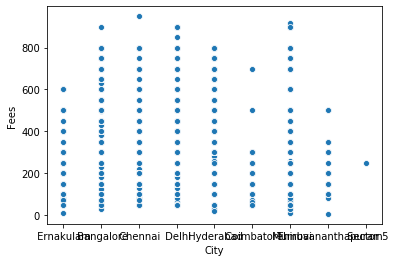

In [43]:
sns.scatterplot(x='City', y='Fees', data=train)

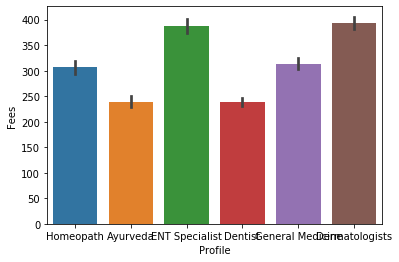

In [45]:
sns.barplot(x='Profile', y='Fees', data=train)
#ENT specialist and dermatologists have high fees

#Univariate Analysis

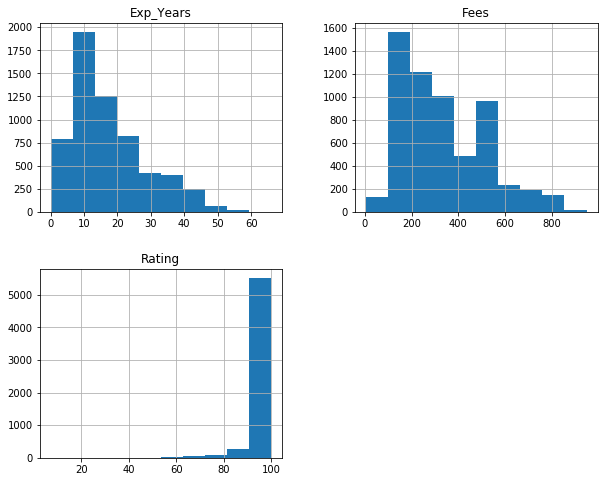

In [48]:
train.hist(figsize=(10,8))
plt.show()

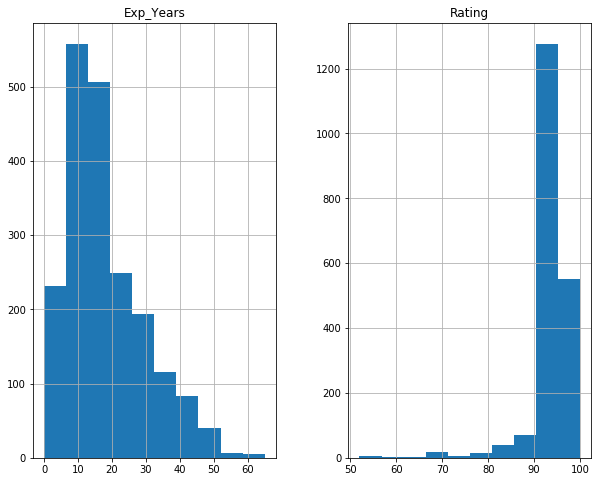

In [49]:
test.hist(figsize=(10,8))
plt.show()

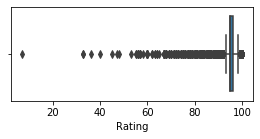

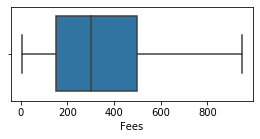

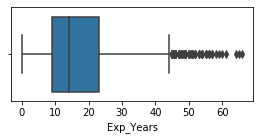

In [50]:
for i in train.columns:
    if train[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(train[i])

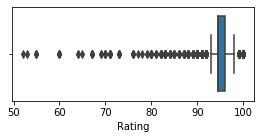

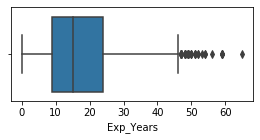

In [51]:
for i in test.columns:
    if test[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(test[i])

##Statistical Analysis

In [52]:
train.describe()

,Rating,Fees,Exp_Years
count,5961.000000,5961.000000,5961.000000
mean,94.643475,307.944640,17.303976
std,5.244204,190.920373,11.142798
min,7.000000,5.000000,0.000000
25%,94.643475,150.000000,9.000000
50%,94.643475,300.000000,14.000000
75%,96.000000,500.000000,23.000000
max,100.000000,950.000000,66.000000


In [53]:
test.describe()

,Rating,Exp_Years
count,1987.000000,1987.000000
mean,94.441472,17.874685
std,5.089688,11.366764
min,52.000000,0.000000
25%,94.441472,9.000000
50%,94.441472,15.000000
75%,96.000000,24.000000
max,100.000000,65.000000


             Rating      Fees  Exp_Years
Rating     1.000000 -0.090106  -0.177438
Fees      -0.090106  1.000000   0.002117
Exp_Years -0.177438  0.002117   1.000000

AxesSubplot(0.125,0.125;0.62x0.755)


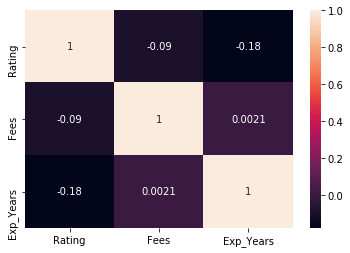

In [56]:
print(train.corr())
print("")
print(sns.heatmap(train.corr(), annot=True))

             Rating  Exp_Years
Rating     1.000000  -0.155206
Exp_Years -0.155206   1.000000

AxesSubplot(0.125,0.125;0.62x0.755)


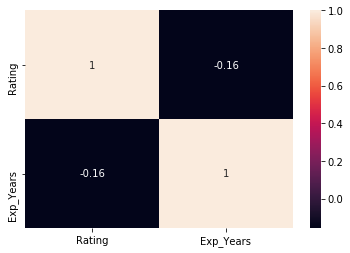

In [58]:
print(test.corr())
print("")
print(sns.heatmap(test.corr(), annot=True))

Observation-
-rating and Exp_years are negatively correlated with each other.

##Further Analysis of the data

In [59]:
train.groupby('Profile').mean()

,Rating,Fees,Exp_Years
Profile,,,
Ayurveda,95.042093,238.968193,16.089059
Dentist,96.574827,238.199714,13.244094
Dermatologists,93.941795,393.133462,14.969052
ENT Specialist,92.418727,387.321429,19.766484
General Medicine,93.629020,313.908781,24.864450
Homeopath,95.264705,306.499407,15.381969


observation-
-Dermatologists are taking the highest fees, while dentist are taking lowest fees

In [60]:
train.groupby('City').mean()

,Rating,Fees,Exp_Years
City,,,
Bangalore,94.203579,328.842607,16.054054
Chennai,95.099383,283.602339,18.014035
Coimbatore,95.215673,154.298246,16.785088
Delhi,94.411103,363.006757,18.646959
Ernakulam,95.302470,188.431373,16.712418
Hyderabad,94.365380,307.507886,15.904311
Mumbai,94.993393,308.292863,18.488105
Sector 5,94.643475,250.000000,11.000000
Thiruvananthapuram,95.170776,167.267442,15.941860


observation-
-in cities like Bangalore, Delhi,mumbai, doctors are taking highest fees.

#LabelEncoding

In [62]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [66]:
train['Qualification']=pd.DataFrame(lb.fit_transform(train['Qualification']))
train['Profile']=pd.DataFrame(lb.fit_transform(train['Profile']))


In [67]:
train['Region']=lb.fit_transform(train['Region'].astype(str))
train['City']=lb.fit_transform(train['City'].astype(str))

In [68]:
train.head()

,Qualification,Rating,Profile,Fees,Exp_Years,Region,City
0,401,51,5,9,23,296,4
1,73,49,0,22,11,855,0
2,1135,45,3,21,8,452,0
3,464,45,0,17,11,68,0
4,10,51,0,17,19,335,1


In [69]:
#test data
for i in test.columns:
    if test.columns.dtype=='O':
        test[i]=lb.fit_transform(test[i].astype(str))

In [70]:
test.head()

,Qualification,Rating,Profile,Exp_Years,Region,City
0,241,31,4,28,142,6
1,340,31,3,24,577,5
2,258,9,2,34,212,1
3,6,31,0,0,373,3
4,79,0,1,7,231,0


##Removing outliers

In [72]:
#training dataset
from scipy.stats import zscore
z=np.abs(zscore(train))
print("The datashape before removing outliers is ", train.shape)
train=train[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", train.shape)

The datashape before removing outliers is  (5961, 7)
The datashape after removing outliers is  (5787, 7)


In [73]:
#test dataset
from scipy.stats import zscore
z=np.abs(zscore(test))
print("The datashape before removing outliers is ", test.shape)
test=test[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", test.shape)

The datashape before removing outliers is  (1987, 6)
The datashape after removing outliers is  (1987, 6)


#Splitting the data into target and input variable

In [74]:
x=train.drop('Fees', axis=1)
x.head()

,Qualification,Rating,Profile,Exp_Years,Region,City
0,401,51,5,23,296,4
1,73,49,0,11,855,0
2,1135,45,3,8,452,0
3,464,45,0,11,68,0
4,10,51,0,19,335,1


In [75]:
y=pd.DataFrame(train['Fees'])
y.head()

,Fees
0,9
1,22
2,21
3,17
4,17


In [76]:
print(x.shape)
print(y.shape)

(5787, 6)
(5787, 1)


# Scaling the data

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5
0,-0.453012,1.580069,1.544528,0.666251,-0.457106,0.374624
1,-1.242946,0.973773,-1.450441,-0.459142,1.715483,-1.317433
2,1.314706,-0.238820,0.346541,-0.740490,0.149198,-1.317433
3,-0.301287,-0.238820,-1.450441,-0.459142,-1.343242,-1.317433
4,-1.394671,1.580069,-1.450441,0.291120,-0.305530,-0.894419


#importing necessary libraries

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [79]:
def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [80]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.1088794045890108 is achieved at random state 88


In [81]:
#Finalising the train test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=74,test_size=0.20)

In [82]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [83]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'friedman_mse'}

In [84]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 1, 'kernel': 'rbf'}

In [87]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='friedman_mse'),SVR(C=1,kernel='rbf'), GaussianNB()]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.09412807521643629
The cross val score is 0.0772786936735143
The mean squared error is 60.135919197923286
The root mean squared error is 7.754735275812018




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.14262310293990121
The cross val score is 0.12889466566187469
The mean squared error is 56.916597582037994
The root mean squared error is 7.544308953246679




DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_s

In [88]:
result1=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR','GaussianNB'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result1

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.094128,0.077279,60.135919,7.754735
1,KNeighborsRegressor,0.142623,0.128895,56.916598,7.544309
2,DecisionTreeRegressor,-0.517887,-0.493114,100.764249,10.038140
3,SVR,0.145671,0.119397,56.714248,7.530886
4,GaussianNB,-1.261109,-1.247303,150.102763,12.251643


#Let us try to boost our scores by trying boosters and lasso and ridge

## Lasso

In [89]:
#Let us check the best parameters for lasso
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(ls,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 0.01}

In [93]:
#Let us check the best r2 score for Lasso
ls=Lasso(alpha=0.01)
max_r2_score(ls,x,y)

The maximum r2 score 0.10862467173313572 is achieved at random state 88


In [94]:
#Let us check the cross val score for lasso
cross=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.07732717318844747


##Ridge

In [92]:
#Let us check the best parameters for Ridge
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
gd=GridSearchCV(rd,parameters)
gd.fit(train_x,train_y)
gd.best_params_

{'alpha': 1}

In [95]:
#Let us check the best r2 score for Ridge
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The maximum r2 score 0.10887357074729631 is achieved at random state 88


In [96]:
#Let us check the cross val score for Ridge
cross=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.07727953621167787


Ensemble Techniques

In [97]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [98]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 500}

In [99]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y)

The maximum r2 score 0.24096970294751174 is achieved at random state 89


In [100]:
#Let us check the cross val score for Random Forest
cross=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.1961520069705727


##GradientBoostingRegressor

In [101]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [102]:
#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x,y)

The maximum r2 score 0.27494763849475834 is achieved at random state 59


In [103]:
#Let us check the cross val score for Gradient Boosting Regressor
cross=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.23194603816361026


In [104]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.01, 'n_estimators': 200}

In [105]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=200,learning_rate=0.01)
max_r2_score(ad,x,y)

The maximum r2 score 0.17661584003427333 is achieved at random state 49


In [106]:
#Let us check the cross val score for AdaBoost Regressor
cross=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.1402036177683684


In [108]:
result2=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.108,0.108,0.240,0.274,0.176],'Cross_val_score':[0.077,0.077,0.196,0.231,0.140]})
result2

,Boosters,R2 Score,Cross_val_score
0,Lasso,0.108,0.077
1,Ridge,0.108,0.077
2,RandomForestRegressor,0.240,0.196
3,GradientBoostRegressor,0.274,0.231
4,AdaBoostRegressor,0.176,0.140


In [109]:
#None of the algorithms are giving good scores, Gradient Boosting Regressor is giving little better scores. 
#So we can finalise the same
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=71,test_size=0.20)
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
gb.fit(train_x,train_y)
pred=gb.predict(test_x)
r2score=r2_score(test_y,pred)
cv=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.2342703722619479
The cross val score is 0.23174278346315633


In [111]:
#predicting the test data
predtest=gb.predict(test)
pd.DataFrame(predtest).to_excel("doctor's_Fees_Consultation.xlsx")

In [113]:
#saving the model
from sklearn.externals import joblib
joblib.dump(gb,'Project13_Doctors_fees_Consultation.pkl')

['Project13_Doctors_fees_Consultation.pkl']